In [6]:
class AdalineGD(object):
    
    def __int__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors ** 2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """no effect, an identity function"""
        return X
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >=0.0, 1, -1)

TypeError: AdalineGD() takes no arguments

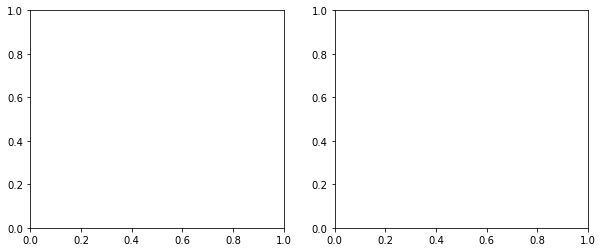

In [7]:
import matplotlib.pyplot as plt

#plot cost vs number of epochs for two different learning rates
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))

#eta = 0.01
ada1 = AdalineGD(n_iter = 10, eta = 0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1),
          np.log10(ada1.cost_),)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-sq-errors)')
ax[0].set_title('Adaline - Learning rate 0.01')

#eta = 0.0001
ada2 = AdalineGD(n_iter = 10, eta = 0.0001).fit(X, y)
ax[1].plot(range(1, len(ada1.cost_) + 1),
          np.log10(ada1.cost_),)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-sq-errors)')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()